In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)    #显示所有列
pd.set_option('display.max_rows', 30)    #显示所有行
pd.set_option('max_colwidth',100)    #设置value的显示长度为100，默认为50

import warnings
warnings.filterwarnings("ignore")

import  seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\Administrator\TianChi_Data\train.csv',
                   encoding='UTF-8', index_col=0,header=0)
data.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [ ]:
'''
Field	Description
id	为贷款清单分配的唯一信用证标识
loanAmnt	贷款金额
term	贷款期限（year）
interestRate	贷款利率
installment	分期付款金额
grade	贷款等级
subGrade	贷款等级之子级
employmentTitle	就业职称
employmentLength	就业年限（年）
homeOwnership	借款人在登记时提供的房屋所有权状况
annualIncome	年收入
verificationStatus	验证状态
issueDate	贷款发放的月份
purpose	借款人在贷款申请时的贷款用途类别
postCode	借款人在贷款申请中提供的邮政编码的前3位数字
regionCode	地区编码
dti	债务收入比
delinquency_2years	借款人过去2年信用档案中逾期30天以上的违约事件数
ficoRangeLow	借款人在贷款发放时的fico所属的下限范围
ficoRangeHigh	借款人在贷款发放时的fico所属的上限范围
openAcc	借款人信用档案中未结信用额度的数量
pubRec	贬损公共记录的数量
pubRecBankruptcies	公开记录清除的数量
revolBal	信贷周转余额合计
revolUtil	循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额
totalAcc	借款人信用档案中当前的信用额度总数
initialListStatus	贷款的初始列表状态
applicationType	表明贷款是个人申请还是与两个共同借款人的联合申请
earliesCreditLine	借款人最早报告的信用额度开立的月份
title	借款人提供的贷款名称
policyCode	公开可用的策略_代码=1新产品不公开可用的策略_代码=2
n系列匿名特征	匿名特征n0-n14，为一些贷款人行为计数特征的处理
'''

In [21]:
data.columns

Index(['loanAmnt', 'term', 'interestRate', 'installment', 'grade', 'subGrade',
       'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome',
       'verificationStatus', 'issueDate', 'isDefault', 'purpose', 'postCode',
       'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType',
       'earliesCreditLine', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n2.1',
       'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

###  把要预测Y变量的放在最后一列

In [3]:
data = data[['loanAmnt', 'term', 'interestRate', 'installment', 'grade', 'subGrade',
       'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome',
       'verificationStatus', 'issueDate', 'purpose', 'postCode',
       'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType',
       'earliesCreditLine', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n2.1',
       'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14','isDefault']]
data.head(1)

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,isDefault
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 799999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            800000 non-null  float64
 1   term                800000 non-null  int64  
 2   interestRate        800000 non-null  float64
 3   installment         800000 non-null  float64
 4   grade               800000 non-null  object 
 5   subGrade            800000 non-null  object 
 6   employmentTitle     799999 non-null  float64
 7   employmentLength    753201 non-null  object 
 8   homeOwnership       800000 non-null  int64  
 9   annualIncome        800000 non-null  float64
 10  verificationStatus  800000 non-null  int64  
 11  issueDate           800000 non-null  object 
 12  purpose             800000 non-null  int64  
 13  postCode            799999 non-null  float64
 14  regionCode          800000 non-null  int64  
 15  dti                 799761 non-nul

###  info比下面这个方法简便多了

In [3]:
for item in data.columns:
    desc = data[item].isnull().sum()
    print( item + ':' +  str(desc))

loanAmnt:0
term:0
interestRate:0
installment:0
grade:0
subGrade:0
employmentTitle:1
employmentLength:46799
homeOwnership:0
annualIncome:0
verificationStatus:0
issueDate:0
isDefault:0
purpose:0
postCode:1
regionCode:0
dti:239
delinquency_2years:0
ficoRangeLow:0
ficoRangeHigh:0
openAcc:0
pubRec:0
pubRecBankruptcies:405
revolBal:0
revolUtil:531
totalAcc:0
initialListStatus:0
applicationType:0
earliesCreditLine:0
title:1
policyCode:0
n0:40270
n1:40270
n2:40270
n2.1:40270
n4:33239
n5:40270
n6:40270
n7:40270
n8:40271
n9:40270
n10:33239
n11:69752
n12:40270
n13:40270
n14:40270


In [19]:
'''
data.columns[data.isnull().sum()> 0]
通过这一步  得到有缺失值的数据列
'''

'\ndata.columns[data.isnull().sum()> 0]\n通过这一步  得到有缺失值的数据列\n'

In [17]:
data[data.columns[data.isnull().sum()> 0]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 799999
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   employmentTitle     799999 non-null  float64
 1   employmentLength    753201 non-null  object 
 2   postCode            799999 non-null  float64
 3   dti                 799761 non-null  float64
 4   pubRecBankruptcies  799595 non-null  float64
 5   revolUtil           799469 non-null  float64
 6   title               799999 non-null  float64
 7   n0                  759730 non-null  float64
 8   n1                  759730 non-null  float64
 9   n2                  759730 non-null  float64
 10  n2.1                759730 non-null  float64
 11  n4                  766761 non-null  float64
 12  n5                  759730 non-null  float64
 13  n6                  759730 non-null  float64
 14  n7                  759730 non-null  float64
 15  n8                  759729 non-nul

In [71]:
data[data.columns[data.isnull().sum()> 0]].columns

AttributeError: 'Index' object has no attribute 'info'

### 用列均值填充 列缺失值

In [5]:
import re

lst = []
data['employmentLength'] = data['employmentLength'].fillna('0 years')
parten = r'\D*?(\d+)\s?'
for value in data['employmentLength'].values:
    res = re.match(parten,str(value))
    ans = int(res.group(1))
    lst.append(ans)
lst[:5]

[2, 5, 8, 10, 0]

In [6]:
data['employmentLength'] = np.array(lst)
data['employmentLength']

id
0          2
1          5
2          8
3         10
4          0
          ..
799995     7
799996    10
799997    10
799998    10
799999     5
Name: employmentLength, Length: 800000, dtype: int32

In [7]:
data.head(5)

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,isDefault
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,E,E2,320.0,2,2,110000.0,2,2014-07-01,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0,1
1,18000.0,5,18.49,461.90,D,D2,219843.0,5,0,46000.0,2,2012-08-01,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,0
2,12000.0,5,16.99,298.17,D,D3,31698.0,8,0,74000.0,2,2015-10-01,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0,0
3,11000.0,3,7.26,340.96,A,A4,46854.0,10,1,118000.0,1,2015-08-01,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0,0
4,3000.0,3,12.99,101.07,C,C2,54.0,0,1,29000.0,2,2016-03-01,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0,0


In [8]:
for var in data[data.columns[data.isnull().sum()> 0]].columns:
    data[var] = data[var].fillna(data[var].mean())

In [9]:
data.head(5)

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,isDefault
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,E,E2,320.0,2,2,110000.0,2,2014-07-01,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.000000,2.00000,2.000000,2.000000,4.0,9.000000,8.000000,4.000000,12.000000,2.000000,7.0,0.000000,0.000000,0.000000,2.000000,1
1,18000.0,5,18.49,461.90,D,D2,219843.0,5,0,46000.0,2,2012-08-01,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,0.511932,3.64233,5.642648,5.642648,10.0,8.107937,8.575994,8.282953,14.622488,5.592345,13.0,0.000815,0.003384,0.089366,2.178606,0
2,12000.0,5,16.99,298.17,D,D3,31698.0,8,0,74000.0,2,2015-10-01,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.000000,0.00000,3.000000,3.000000,0.0,0.000000,21.000000,4.000000,5.000000,3.000000,11.0,0.000000,0.000000,0.000000,4.000000,0
3,11000.0,3,7.26,340.96,A,A4,46854.0,10,1,118000.0,1,2015-08-01,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.000000,4.00000,6.000000,6.000000,4.0,16.000000,4.000000,7.000000,21.000000,6.000000,9.0,0.000000,0.000000,0.000000,1.000000,0
4,3000.0,3,12.99,101.07,C,C2,54.0,0,1,29000.0,2,2016-03-01,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.000000,2.00000,7.000000,7.000000,2.0,4.000000,9.000000,10.000000,15.000000,7.000000,12.0,0.000000,0.000000,0.000000,4.000000,0


###  缺失值处理完毕

In [40]:
data[data.columns[data.isnull().sum()> 0]].sort()

AttributeError: 'DataFrame' object has no attribute 'sort'

In [36]:
data['isDefault'].describe()

count    800000.000000
mean          0.199513
std           0.399634
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: isDefault, dtype: float64

In [37]:
sum(data['isDefault'])

159610

In [38]:
data.describe()

,loanAmnt,term,interestRate,installment,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,isDefault
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.0,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,14416.818875,3.482745,13.238391,437.947723,72005.351714,5.696544,0.614213,7.613391e+04,1.009683,1.745982,258.535648,16.385758,18.284557,0.318239,696.204081,700.204226,11.598020,0.214915,0.134163,1.622871e+04,51.790734,24.998861,0.416953,0.019267,1754.113589,1.0,0.511932,3.642330,5.642648,5.642648,4.735641,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606,0.199513
std,8716.086178,0.855832,4.765757,261.460393,106585.573588,3.735483,0.675749,6.894751e+04,0.782716,2.367453,200.037321,11.036679,11.148489,0.880325,31.865995,31.866674,5.475286,0.606467,0.377375,2.245802e+04,24.507988,11.999201,0.493055,0.137464,7941.469077,0.0,1.299276,2.189545,3.218609,3.218609,2.888035,4.676860,7.211869,4.445395,7.917478,3.134192,5.368966,0.028734,0.060460,0.496091,1.797357,0.399634
min,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,3.000000,9.750000,248.450000,427.000000,2.000000,0.000000,4.560000e+04,0.000000,0.000000,103.000000,8.000000,11.800000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.944000e+03,33.500000,16.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,12000.000000,3.000000,12.740000,375.135000,7755.000000,6.000000,1.000000,6.500000e+04,1.000000,0.000000,203.000000,14.000000,17.620000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113200e+04,52.100000,23.000000,0.000000,0.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,8.000000,14.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,20000.000000,3.000000,15.990000,580.710000,117663.250000,10.000000,1.000000,9.000000e+04,2.000000,4.000000,395.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.973400e+04,70.700000,32.000000,1.000000,0.000000,5.000000,1.0,0.511932,5.000000,7.000000,7.000000,6.000000,10.000000,11.000000,10.000000,18.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000,0.000000
max,40000.000000,5.000000,30.990000,1715.420000,378351.000000,10.000000,5.000000,1.099920e+07,2.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.000000,850.000000,86.000000,86.000000,12.000000,2.904836e+06,892.300000,162.000000,1.000000,1.000000,61680.000000,1.0,51.000000,33.000000,63.000000,63.000000,49.000000,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000,1.000000


###  观察每个（类型为Object）特征与isDefault之间的关系

In [39]:
var = 'grade'
data[[var,'isDefault']].groupby([var],as_index = False).mean().sort_values(by=var,ascending=False)

,grade,isDefault
6,G,0.497017
5,F,0.453524
4,E,0.384291
3,D,0.303852
2,C,0.225020
1,B,0.132992
0,A,0.060375


可以看出，贷款等级：grade越高，贷款违约的可能就越大

In [46]:
var = 'subGrade'
data[[var,'isDefault']].groupby([var],as_index = False).mean().sort_values(by=var,ascending=False)

,subGrade,isDefault
34,G5,0.548837
33,G4,0.521971
32,G3,0.519427
31,G2,0.480910
30,G1,0.466174
...,...,...
4,A5,0.085399
3,A4,0.067221
2,A3,0.055882
1,A2,0.045697


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 799999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            800000 non-null  float64
 1   term                800000 non-null  int64  
 2   interestRate        800000 non-null  float64
 3   installment         800000 non-null  float64
 4   grade               800000 non-null  object 
 5   subGrade            800000 non-null  object 
 6   employmentTitle     800000 non-null  float64
 7   employmentLength    800000 non-null  int32  
 8   homeOwnership       800000 non-null  int64  
 9   annualIncome        800000 non-null  float64
 10  verificationStatus  800000 non-null  int64  
 11  issueDate           800000 non-null  object 
 12  purpose             800000 non-null  int64  
 13  postCode            800000 non-null  float64
 14  regionCode          800000 non-null  int64  
 15  dti                 800000 non-nul

In [42]:
var = 'issueDate'
data[[var,'isDefault']].groupby([var],as_index = False).mean().sort_values(by=var,ascending=False)[:24]

,issueDate,isDefault
138,2018-12-01,0.012064
137,2018-11-01,0.013514
136,2018-10-01,0.043930
135,2018-09-01,0.074982
134,2018-08-01,0.081120
133,2018-07-01,0.126667
132,2018-06-01,0.160181
131,2018-05-01,0.177981
130,2018-04-01,0.193029
129,2018-03-01,0.198912


####  issueDate：贷款月份和是否违约，无显著关系

In [44]:
var = 'earliesCreditLine'
data[[var,'isDefault']].groupby([var],as_index = False).mean().sort_values(by=var,ascending=False)[:12]

,earliesCreditLine,isDefault
719,Sep-2015,0.000000
718,Sep-2014,0.230769
717,Sep-2013,0.273381
716,Sep-2012,0.273043
715,Sep-2011,0.256944
714,Sep-2010,0.216778
713,Sep-2009,0.210811
712,Sep-2008,0.208886
711,Sep-2007,0.217997
710,Sep-2006,0.212836


#### earliesCreditLine：借款人最早报告的信用额度开立的月份

与是否违约也没啥关系

##  去掉与违约无关的特征

In [45]:
data.columns

Index(['loanAmnt', 'term', 'interestRate', 'installment', 'grade', 'subGrade',
       'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome',
       'verificationStatus', 'issueDate', 'purpose', 'postCode', 'regionCode',
       'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc',
       'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'isDefault'],
      dtype='object')

In [10]:
data = data[['loanAmnt', 'term', 'interestRate', 'installment', 'grade', 'subGrade',
       'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome',
       'verificationStatus',  'purpose', 'postCode', 'regionCode',
       'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc',
       'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'isDefault']]
data.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,isDefault
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,E,E2,320.0,2,2,110000.0,2,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,1.0,1.0,0.000000,2.00000,2.000000,2.000000,4.0,9.000000,8.000000,4.000000,12.000000,2.000000,7.0,0.000000,0.000000,0.000000,2.000000,1
1,18000.0,5,18.49,461.90,D,D2,219843.0,5,0,46000.0,2,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,1723.0,1.0,0.511932,3.64233,5.642648,5.642648,10.0,8.107937,8.575994,8.282953,14.622488,5.592345,13.0,0.000815,0.003384,0.089366,2.178606,0
2,12000.0,5,16.99,298.17,D,D3,31698.0,8,0,74000.0,2,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,0.0,1.0,0.000000,0.00000,3.000000,3.000000,0.0,0.000000,21.000000,4.000000,5.000000,3.000000,11.0,0.000000,0.000000,0.000000,4.000000,0
3,11000.0,3,7.26,340.96,A,A4,46854.0,10,1,118000.0,1,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,4.0,1.0,6.000000,4.00000,6.000000,6.000000,4.0,16.000000,4.000000,7.000000,21.000000,6.000000,9.0,0.000000,0.000000,0.000000,1.000000,0
4,3000.0,3,12.99,101.07,C,C2,54.0,0,1,29000.0,2,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,11.0,1.0,1.000000,2.00000,7.000000,7.000000,2.0,4.000000,9.000000,10.000000,15.000000,7.000000,12.0,0.000000,0.000000,0.000000,4.000000,0


In [14]:
data.head(20)

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,isDefault
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,E,E2,320.0,2,2,110000.0,2,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,1.0,1.0,0.000000,2.00000,2.000000,2.000000,4.0,9.000000,8.000000,4.000000,12.000000,2.000000,7.0,0.000000,0.000000,0.000000,2.000000,1
1,18000.0,5,18.49,461.90,D,D2,219843.0,5,0,46000.0,2,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,1723.0,1.0,0.511932,3.64233,5.642648,5.642648,10.0,8.107937,8.575994,8.282953,14.622488,5.592345,13.0,0.000815,0.003384,0.089366,2.178606,0
2,12000.0,5,16.99,298.17,D,D3,31698.0,8,0,74000.0,2,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,0.0,1.0,0.000000,0.00000,3.000000,3.000000,0.0,0.000000,21.000000,4.000000,5.000000,3.000000,11.0,0.000000,0.000000,0.000000,4.000000,0
3,11000.0,3,7.26,340.96,A,A4,46854.0,10,1,118000.0,1,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,4.0,1.0,6.000000,4.00000,6.000000,6.000000,4.0,16.000000,4.000000,7.000000,21.000000,6.000000,9.0,0.000000,0.000000,0.000000,1.000000,0
4,3000.0,3,12.99,101.07,C,C2,54.0,0,1,29000.0,2,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,11.0,1.0,1.000000,2.00000,7.000000,7.000000,2.0,4.000000,9.000000,10.000000,15.000000,7.000000,12.0,0.000000,0.000000,0.000000,4.000000,0
5,11000.0,3,7.99,344.65,A,A5,51727.0,7,0,39000.0,2,9,512.0,21,17.14,0.0,730.0,734.0,19.0,0.0,0.0,4047.0,31.1,52.0,1,0,10.0,1.0,12.000000,1.00000,2.000000,2.000000,1.0,1.000000,48.000000,2.000000,3.000000,2.000000,19.0,0.000000,0.000000,0.000000,0.000000,0
6,2050.0,3,7.69,63.95,A,A4,180083.0,9,0,35000.0,0,0,517.0,14,17.49,0.0,755.0,759.0,12.0,0.0,0.0,3111.0,8.5,23.0,0,0,0.0,1.0,0.000000,1.00000,3.000000,3.000000,7.0,11.000000,3.000000,10.000000,18.000000,3.000000,12.0,0.000000,0.000000,0.000000,3.000000,0
7,11500.0,3,14.98,398.54,C,C3,214017.0,1,1,30000.0,2,0,100.0,4,32.60,0.0,665.0,669.0,8.0,1.0,1.0,14021.0,59.7,33.0,1,0,0.0,1.0,0.000000,4.00000,4.000000,4.000000,4.0,16.000000,10.000000,5.000000,21.000000,4.000000,8.0,0.000000,0.000000,0.000000,2.000000,0
8,12000.0,3,12.99,404.27,C,C2,188.0,5,2,60000.0,1,0,792.0,13,19.22,0.0,690.0,694.0,15.0,0.0,0.0,27176.0,46.0,21.0,1,0,0.0,1.0,0.000000,7.00000,13.000000,13.000000,7.0,7.000000,2.000000,13.000000,17.000000,11.000000,15.0,0.000815,0.000000,0.000000,6.000000,1


发现：interestRate；贷款利率选择太多了。不能作为分类变量。

In [11]:
data.shape

(800000, 44)

##  接下来，理解数值类型特征 与 是否违约（因变量）之间的关系

####  [统计] 直方图  在这一情况下很有用。

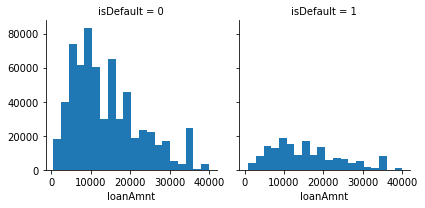

In [52]:
g = sns.FacetGrid(data,col='isDefault')
g.map(plt.hist, 'loanAmnt', bins=20)

(array([ 21005.,  47442.,  88682.,  73903., 102585.,  75709.,  38135.,
         82626.,  38900.,  58773.,  24090.,  30158.,  28536.,  18694.,
         22518.,   6878.,   4464.,  32285.,    371.,   4246.]),
 array([  500.,  2475.,  4450.,  6425.,  8400., 10375., 12350., 14325.,
        16300., 18275., 20250., 22225., 24200., 26175., 28150., 30125.,
        32100., 34075., 36050., 38025., 40000.]),
 <a list of 20 Patch objects>)

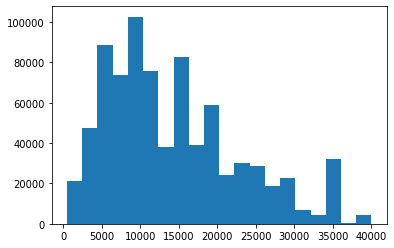

In [54]:
plt.hist(data['loanAmnt'],bins=20)

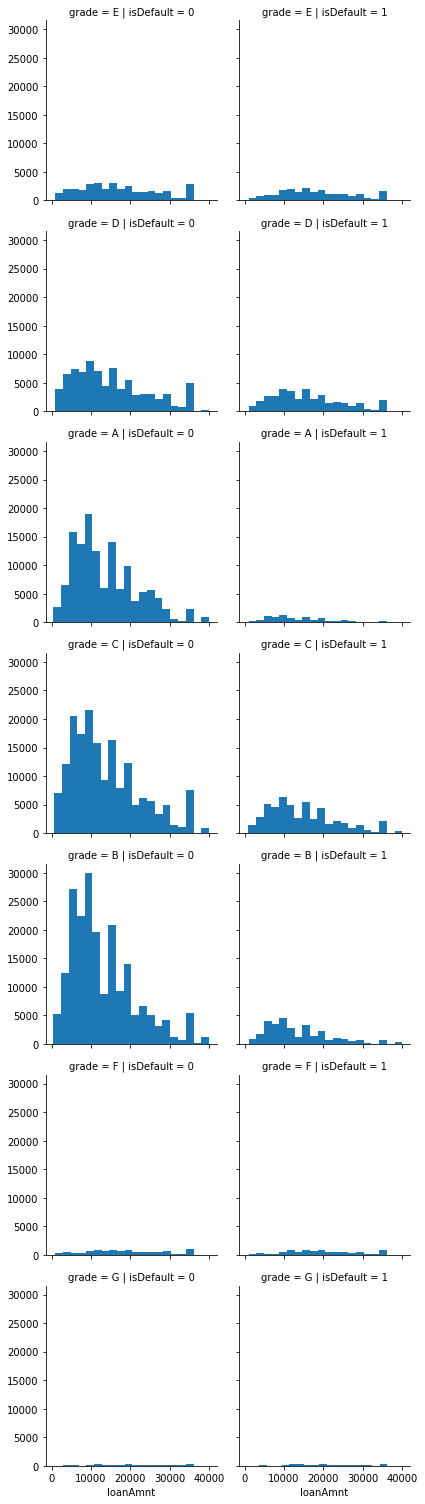

In [55]:
g = sns.FacetGrid(data, col='isDefault', row='grade')
g.map(plt.hist, 'loanAmnt', bins=20)

###  发现，借款数量少的人，不还的可能更大？

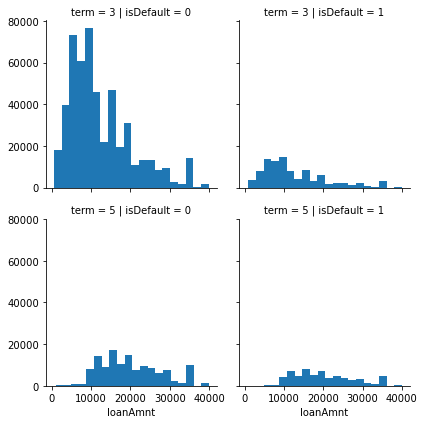

In [13]:
g = sns.FacetGrid(data, col='isDefault', row='term')
g.map(plt.hist, 'loanAmnt', bins=20)

####  在贷款5年的人中，还款违约的可能更大

In [ ]:
loanAmnt	贷款金额
term	贷款期限（year）
interestRate	贷款利率
loanAmnt  贷款金额

###  关联分类特征和数值特征

### 这里近似的将 interestRate：贷款利率 作为连续数值特征

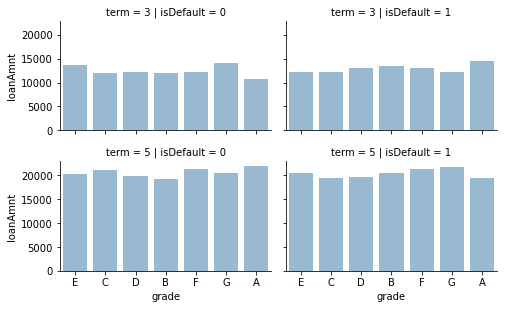

In [20]:
grid = sns.FacetGrid(data, row='term', col='isDefault',size=2.2, aspect=1.6)
grid.map(sns.barplot, 'grade', 'loanAmnt', alpha=0.5, ci=None)
grid.add_legend()

###  才发现，怎么快速看懂，理解画出的图，也是一种学问。。

In [ ]:
"""
示例：删除某一列

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)

"""

##  从现有特征中创建新特征

#  吸取教训，特征工程，可以把测试集 和 训练集 放在一起，一起处理了。

In [ ]:
"""
示例：
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])
"""

####  暂时没有进一步。。

##  转换分类特征

In [ ]:
"""
示例：

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()
"""

###  完成数值连续特征

####  处理缺失或空值

"""
三种方式；
1：一种简单的方法是在均值和标准差之间生成随机数。

2：猜测缺失值的更准确的方法是使用其他相关特征。在我们的案例中，我们注意到了年龄、性别和Pclass之间的相关性。使用Pclass和性别特征组合集合的年龄的 中位数 来猜测年龄值。那么，Pclass=1，性别=0,Pclass=1，性别=1，以此类推。

3：结合方法1和方法2。因此，不要基于中位数猜测年龄值，而是使用基于Pclass和性别组合集的均值和标准差之间的随机数。
"""

In [ ]:
https://www.kaggle.com/startupsci/titanic-data-science-solutions